# Lab5

Го Цзыхань	P33201

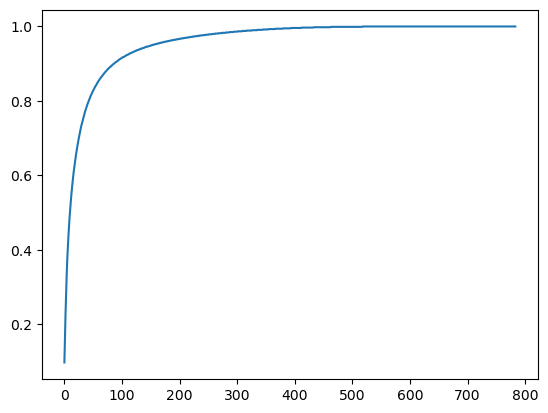

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

variant_number = 4

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=2020)

dim = 784  # 28*28
X_train = X_train.reshape(len(X_train), dim)
X_test = X_test.reshape(len(X_test), dim)

pca = PCA(svd_solver='full')
modelPCA = pca.fit(X_train)

X_train = modelPCA.transform(X_train)

explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 3)

plt.plot(np.arange(dim), explained_variance, ls='-')

## 1.Определите, какое минимальное количество главных компонент необходимо использовать, чтобы доля объясненной дисперсии превышала 0.80 + номер_в_списке % 10. Построить график зависимости доли объясненной дисперсии от количества используемых ГК

Explained Variance: 0.84 Number of Components: 56


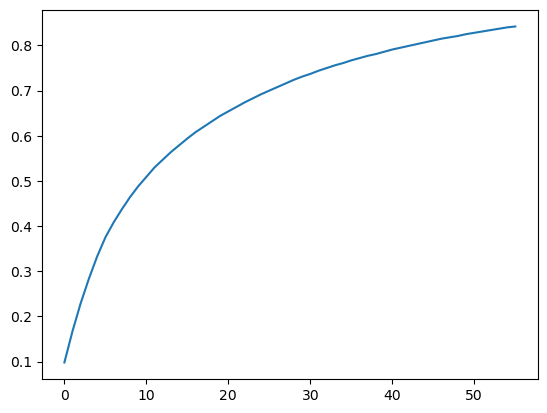

In [2]:
variant_expectation = 0.8 + variant_number % 10 / 100

X_train = X_train.reshape(len(X_train), dim)

pca = PCA(n_components=variant_expectation, svd_solver='full')

modelPCA = pca.fit(X_train)

explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 3)

count = explained_variance.size

plt.plot(np.arange(count), explained_variance, ls='-')

print("Explained Variance: " + str(round(variant_expectation, 2)) + " Number of Components: " + str(count))


## 2.	Выведите количество верно классифицированных объектов класса номер_в_списке % 9 для тестовых данных

In [3]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=2020)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

tree = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=2020)
clf = OneVsRestClassifier(tree).fit(X_train, y_train)

modelPCA = PCA(n_components=count, svd_solver='full').fit(X_test)
X_test = modelPCA.transform(X_test)

class_variant = variant_number % 9

y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_pred)

print("The number of correctly classified images contained in Class " + str(class_variant) + " is: " + str(
    CM[class_variant][class_variant]))


The number of correctly classified images contained in Class 4 is: 1040


## 3.	Введите вероятность отнесения 5 любых изображений из тестового набора к назначенному классу

In [4]:
import random

for i in range(5):
    num = random.randint(0, 10000)
    result = clf.predict_proba(X_test)[num][y_pred[num]]
    print("The probability that picture No." + str(num) + " belongs to Class " + str(y_pred[num]) + " is: " + str(
        round(result, 3)))

The probability that picture No.2821 belongs to Class 3 is: 0.552
The probability that picture No.4888 belongs to Class 4 is: 0.64
The probability that picture No.4213 belongs to Class 9 is: 0.568
The probability that picture No.9355 belongs to Class 4 is: 0.666
The probability that picture No.4666 belongs to Class 7 is: 0.694


## 4.	Определите Accuracy, Precision, Recall и F1 для обученной модели

In [5]:
from sklearn.metrics import classification_report, accuracy_score

targets = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']

print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
print()
print(classification_report(y_test, y_pred, target_names=targets))

Accuracy: 0.8219047619047619

              precision    recall  f1-score   support

     Class 0       0.90      0.90      0.90      1293
     Class 1       0.95      0.96      0.95      1416
     Class 2       0.84      0.83      0.84      1262
     Class 3       0.70      0.75      0.73      1290
     Class 4       0.81      0.86      0.83      1214
     Class 5       0.64      0.56      0.60      1158
     Class 6       0.87      0.91      0.89      1204
     Class 7       0.86      0.91      0.88      1318
     Class 8       0.79      0.78      0.78      1188
     Class 9       0.80      0.73      0.76      1257

    accuracy                           0.82     12600
   macro avg       0.82      0.82      0.82     12600
weighted avg       0.82      0.82      0.82     12600



## 5.	Сделайте вывод про обученную модель  
Я использовал анализ основных компонентов, установил долю объясненной дисперсии выше 84% и обучил модель с основными компонентами 56. Общая точность этой модели составляет 82%, и модель распознает цифры 0, 1 точно высокая степень.